In [ ]:
!pip install kaggle
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d aryarishabh/hand-gesture-recognition-dataset

mkdir: cannot create directory ‘/root/.kaggle/’: File exists
 91% 34.0M/37.6M [00:00<00:00, 93.2MB/s]
100% 37.6M/37.6M [00:00<00:00, 94.8MB/s]


In [ ]:
!unzip /content/hand-gesture-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/train/4/46.jpg    
  inflating: train/train/4/460.jpg   
  inflating: train/train/4/461.jpg   
  inflating: train/train/4/462.jpg   
  inflating: train/train/4/463.jpg   
  inflating: train/train/4/464.jpg   
  inflating: train/train/4/465.jpg   
  inflating: train/train/4/466.jpg   
  inflating: train/train/4/467.jpg   
  inflating: train/train/4/468.jpg   
  inflating: train/train/4/469.jpg   
  inflating: train/train/4/47.jpg    
  inflating: train/train/4/470.jpg   
  inflating: train/train/4/471.jpg   
  inflating: train/train/4/472.jpg   
  inflating: train/train/4/473.jpg   
  inflating: train/train/4/474.jpg   
  inflating: train/train/4/475.jpg   
  inflating: train/train/4/476.jpg   
  inflating: train/train/4/477.jpg   
  inflating: train/train/4/478.jpg   
  inflating: train/train/4/479.jpg   
  inflating: train/train/4/48.jpg    
  inflating: train/train/4/480.jpg   
  inflating: train/train/4/481.jpg   

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, utils

In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [20]:
def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (50, 50))
            images.append(img)
            labels.append(label)
    return images, labels

categories = {
    "0": 0,
    "1": 1,
    "2": 2,
    "3": 3,
    "4": 4,
    "5": 5,
    "6": 6,
    "7": 7,
    "8": 8,
    "9": 9,
    "10": 10,
    "11": 11,
    "12": 12,
    "13": 13,
    "14": 14,
    "15": 15,
    "16": 16,
    "17": 17,
    "18": 18,
    "19": 19,
}


X = []
y = []

for category, label in categories.items():
    folder_path = os.path.join("data/train/", category)
    images, labels = load_images_from_folder(folder_path, label)
    X.extend(images)
    y.extend(labels)

X = np.array(X)
y = np.array(y)

# # Normalize the images to values between 0 and 1
X = X.astype("float32") / 255.0
X

array([[[[0.        , 0.        , 0.        ],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.01176471, 0.01176471, 0.01176471],
         [0.        , 0.        , 0.        ],
         [0.01176471, 0.01176471, 0.01176471],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train = utils.to_categorical(y_train, len(categories))
y_test = utils.to_categorical(y_test, len(categories))

# Step 2: Create the deep learning model for gesture detection

def create_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dense(num_classes, activation="softmax"))
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# Define the input shape and number of classes (gestures)
input_shape = X_train[0].shape
num_classes = len(categories)

# Create the model
model = create_model(input_shape, num_classes)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
450/450 [==============================] - 67s 145ms/step - loss: 0.0995 - accuracy: 0.9732 - val_loss: 0.0010 - val_accuracy: 0.9997
Epoch 2/10
450/450 [==============================] - 61s 136ms/step - loss: 3.4175e-05 - accuracy: 1.0000 - val_loss: 8.8908e-04 - val_accuracy: 0.9997
Epoch 3/10
450/450 [==============================] - 66s 146ms/step - loss: 8.2766e-06 - accuracy: 1.0000 - val_loss: 7.6697e-04 - val_accuracy: 0.9997
Epoch 4/10
450/450 [==============================] - 62s 137ms/step - loss: 4.4230e-06 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 0.9997
Epoch 5/10
450/450 [==============================] - 62s 139ms/step - loss: 2.6833e-06 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 0.9997
Epoch 6/10
450/450 [==============================] - 69s 154ms/step - loss: 1.7499e-06 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 0.9997
Epoch 7/10
450/450 [==============================] - 64s 141ms/step - loss: 1.1863e-06 - accuracy: 1.

In [22]:
# Load and preprocess the test dataset

X_test = []
y_test = []

for category, label in categories.items():
    folder_path = os.path.join("data/test/", category)
    images, labels = load_images_from_folder(folder_path, label)
    X_test.extend(images)
    y_test.extend(labels)

X_test = np.array(X_test)
y_test = np.array(y_test)

X_test = X_test.astype("float32") / 255.0

y_test = utils.to_categorical(y_test, len(categories))

loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


188/188 [==============================] - 6s 34ms/step - loss: 0.0018 - accuracy: 0.9992
Test loss: 0.0018389665056020021
Test accuracy: 0.9991666674613953


In [30]:
from tensorflow.keras.models import save_model, load_model

# Save the trained model
model.save("gesture_detection_model.h5")

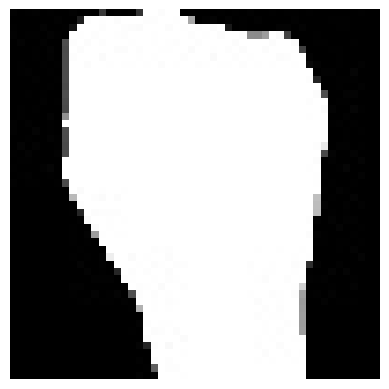

1/1 [==============================] - 0s 30ms/step
Predicted gesture label: 14


In [31]:
import cv2

import matplotlib.pyplot as plt

image_path = "/1004.jpeg"
img = cv2.imread(image_path)

# Load and preprocess the image for prediction
image_path = "./1004.jpg"
img = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct colors
plt.axis("off")  # Hide the axis ticks and labels
plt.show()

img = cv2.resize(img, (50, 50))
img = img.astype("float32") / 255.0
img = np.expand_dims(img, axis=0)  # Add a batch dimension

# Make predictions on the image
predicted_probabilities = model.predict(img)
predicted_label = np.argmax(predicted_probabilities)

# Get the label from the categories dictionary
gesture_label = None
for label, value in categories.items():
    if value == predicted_label:
        gesture_label = label
        break

print("Predicted gesture label:", gesture_label)


In [ ]:
# # Load the saved model
# loaded_model = load_model("gesture_detection_model.h5")